In [1]:
import cv2
import argparse
import imutils
import time
import scipy.io
# from sklearn.svm import SVC
# import skvideo.io
# from sklearn.decomposition import PCA
# from sklearn.manifold import Isomap
# from sklearn.manifold import LocallyLinearEmbedding
# from sklearn.kernel_approximation import Nystroem
# from scipy.ndimage import morphology as mp
from skimage.feature import canny
# from thundersvm import SVC
from random import sample
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction import image
from sklearn.metrics import mean_squared_error
from skimage import measure
from random import shuffle
import natsort
import numpy as np
import matplotlib.pyplot as plt
# import mahotas
# from imutils.video import VideoStream
# from imutils.video import FPS
import os
import pickle
import copy

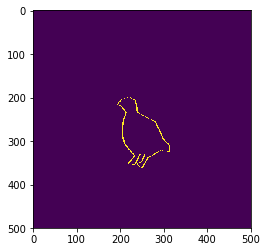

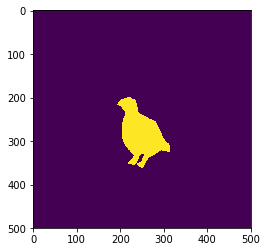

9:LXtRn2BRR2A:LXtRn2BRR2A_1602.png:0.8836452400325467


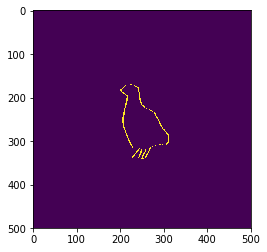

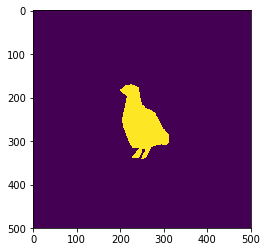

9:LXtRn2BRR2A:LXtRn2BRR2A_239.png:0.8849940921622687


In [12]:
# class_list = [93]
class_list = [
11,17,23,35,39,44,50,57,64,68,75,80,85,9,94,98,
12,18,24,36,40,46,52,58,65,70,76,81,86,90,95,
13,20,25,37,42,48,54,59,66,71,77,83,88,91,96,
16,22,38,43,49,56,63,67,73,78,84,89,93,97]
res = []
for label in [9]:
# for label in class_list:
    old_path = "/storage/OriginalImages/"+str(label)+"/"
    lookup_path = "/storage/OverlapMetric/"+str(label)+"/"
    res_path = "/storage/IndianBirdImages2/"+str(label)+"/"
    dnames = os.listdir(lookup_path)
    for dname in ['LXtRn2BRR2A']:
#     for dname in dnames:
        files = os.listdir(lookup_path+dname+"/")
#         for i in range(2):
#             fnames = os.listdir(lookup_path)
        for file in files:
            fullpath = lookup_path+dname+"/"+file
            gt = cv2.imread(fullpath)
            fullpath = old_path+dname+"/"
            if not os.path.exists(fullpath):
#                 print(fullpath)
                continue
            a = os.listdir(fullpath)
            b = natsort.natsorted(a)
            ind = b.index(file)
            fullpath = res_path+dname+"/"
            if not os.path.exists(fullpath):
#                 print(fullpath)
                continue
            a = os.listdir(fullpath)
            b = natsort.natsorted(a)
            fname = b[ind]
            fullpath = res_path+dname+"/"+fname
            img = cv2.imread(fullpath)
            if img is None:
                print("no img:"+fullpath)
                continue
            a = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#             a = (a.astype(bool)).astype(int)
#             a = (a.astype(bool))
            b = cv2.cvtColor(gt, cv2.COLOR_BGR2GRAY)
            b = cv2.copyMakeBorder(b,50,50,0,0,cv2.BORDER_CONSTANT,value=[0,0,0])
            translation_matrix = np.float32([ [1,0,3], [0,1,0] ])
            b1 = cv2.warpAffine(b, translation_matrix, b.shape)
#             print(b.shape)
#             print(b1.shape)
#             ret,c = cv2.threshold(reconstructed,0.4,1,cv2.THRESH_BINARY)
#             plt.imshow(c.astype(int)*255),plt.show();
#             plt.imshow(a.astype(int)*255),plt.show();
#             from sklearn.metrics import mean_squared_error
#             from skimage import measure
#             print(mean_squared_error(a,b) )
#             print(measure.compare_ssim(a,b))
#             print(np.unique(a))
#             print(measure.compare_psnr(b,a))
            im1 = np.logical_xor(b1.astype(bool),b.astype(bool))
            im2 = np.logical_or(b1.astype(bool),b.astype(bool))
            plt.imshow(im1.astype(int)*255),plt.show();
            plt.imshow(im2.astype(int)*255),plt.show();
            intersection = sum(sum(np.logical_and(b1.astype(bool),b.astype(bool))))
            union = sum(sum(np.logical_or(b1.astype(bool),b.astype(bool))))
            iou = intersection/union
            res.append(iou)
#             res.append(measure.compare_psnr(b,a))
#             if(iou<0.5):
            print(str(label)+':'+dname+":"+fname+":"+str(iou))
#             print(str(intersection)+":"+str(union))
#             inter1 = np.logical_and(a,b)
#             inter1 = sum(sum(inter1))
#             print(inter1)
#             if(iou<0.5):
#                 print(str(label)+':'+dname+":"+fname+":"+str(iou))
# print("Mean psnr:")
# print(str(np.mean(res)))
# print("Median:")
# print(str(np.median(res)))
# print("90th percentile:")
# print(str(np.percentile(res,90)))

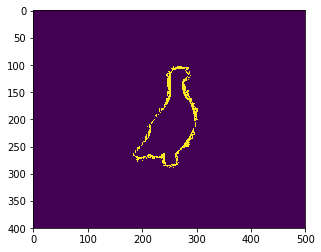

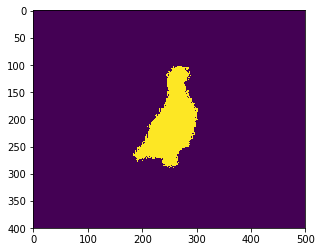

9:744LHx8wSVY:744LHx8wSVY_72.png:0.7892512632062472


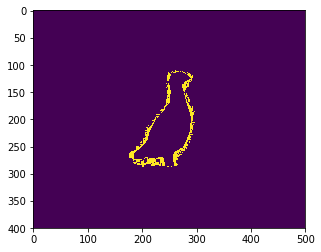

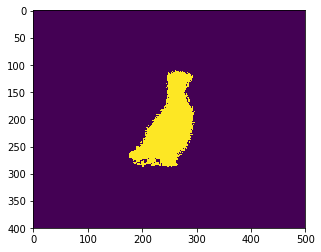

9:744LHx8wSVY:744LHx8wSVY_279.png:0.7648994515539306


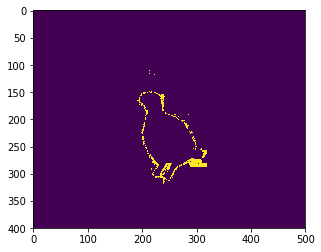

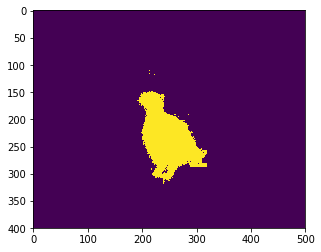

9:LXtRn2BRR2A:LXtRn2BRR2A_1602.png:0.8383903199193327


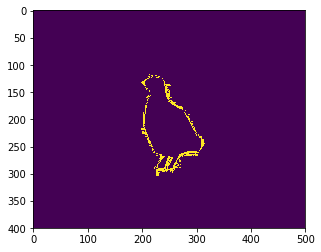

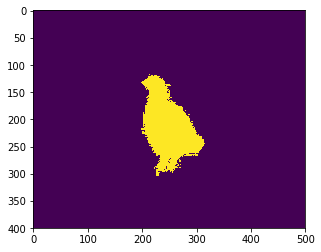

9:LXtRn2BRR2A:LXtRn2BRR2A_239.png:0.8285714285714286


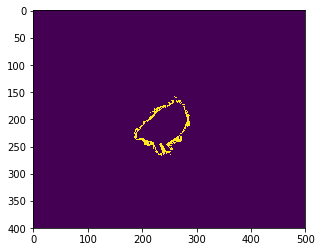

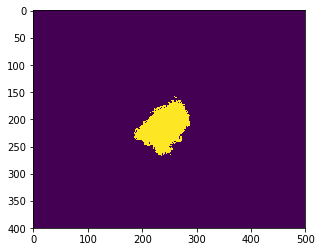

9:RjkI5GazOCQ:RjkI5GazOCQ_2360.png:0.7686307053941909


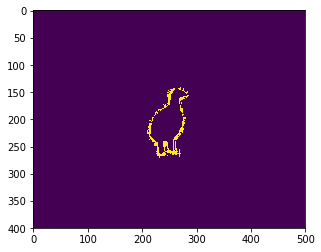

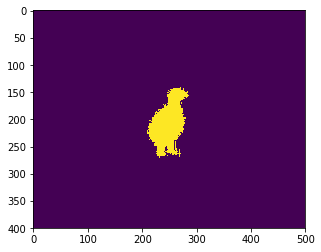

9:RjkI5GazOCQ:RjkI5GazOCQ_83.png:0.7302402347331745


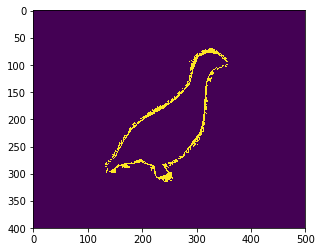

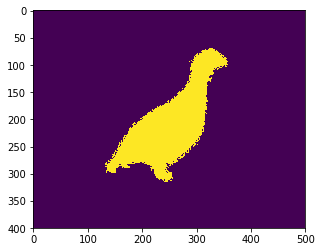

9:j8JWGuf91iY:j8JWGuf91iY_59.png:0.8234674425604495


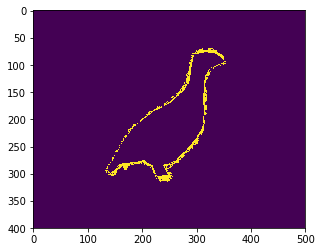

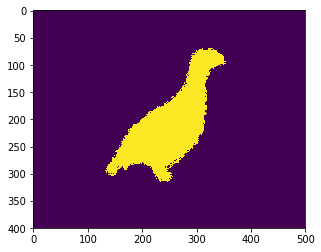

9:j8JWGuf91iY:j8JWGuf91iY_89.png:0.8448060075093867


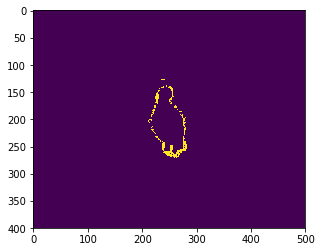

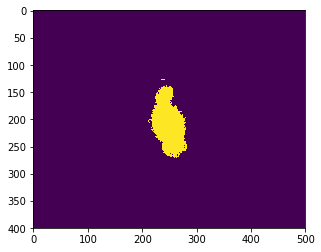

9:_dQFefhBscE:_dQFefhBscE_58.png:0.8012037528766154


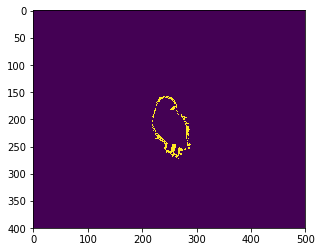

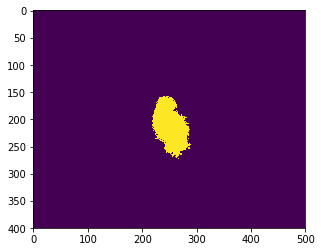

9:_dQFefhBscE:_dQFefhBscE_640.png:0.7865168539325843


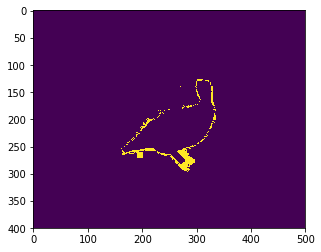

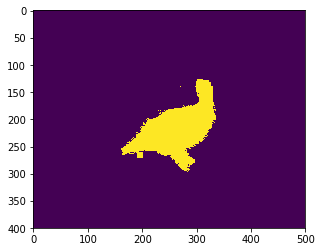

9:C3wkLDsVUwM:C3wkLDsVUwM_1533.png:0.8324285486188727


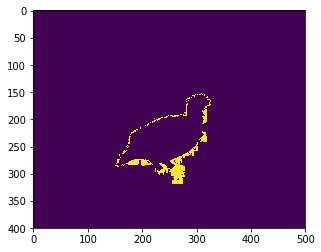

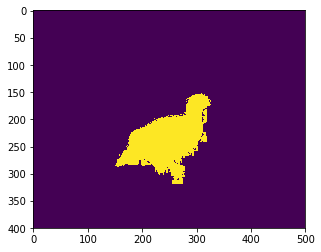

9:C3wkLDsVUwM:C3wkLDsVUwM_756.png:0.7974778001641668


In [16]:
# class_list = [93]
class_list = [
11,17,23,35,39,44,50,57,64,68,75,80,85,9,94,98,
12,18,24,36,40,46,52,58,65,70,76,81,86,90,95,
13,20,25,37,42,48,54,59,66,71,77,83,88,91,96,
16,22,38,43,49,56,63,67,73,78,84,89,93,97]
res = []
for label in [9]:
# for label in class_list:
    old_path = "/storage/OriginalImages/"+str(label)+"/"
    lookup_path = "/storage/OverlapMetric/"+str(label)+"/"
    res_path = "/storage/IndianBirdImages2/"+str(label)+"/"
    dnames = os.listdir(lookup_path)
#     for dname in ['LXtRn2BRR2A']:
    for dname in dnames:
        files = os.listdir(lookup_path+dname+"/")
#         for i in range(2):
#             fnames = os.listdir(lookup_path)
        for file in files:
            fullpath = lookup_path+dname+"/"+file
            gt = cv2.imread(fullpath)
            fullpath = old_path+dname+"/"
            if not os.path.exists(fullpath):
#                 print(fullpath)
                continue
            a = os.listdir(fullpath)
            b = natsort.natsorted(a)
            ind = b.index(file)
            fullpath = res_path+dname+"/"
            if not os.path.exists(fullpath):
#                 print(fullpath)
                continue
            a = os.listdir(fullpath)
            b = natsort.natsorted(a)
            fname = b[ind]
            fullpath = res_path+dname+"/"+fname
            img = cv2.imread(fullpath)
            if img is None:
                print("no img:"+fullpath)
                continue
            a = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#             a = (a.astype(bool)).astype(int)
#             a = (a.astype(bool))
            b = cv2.cvtColor(gt, cv2.COLOR_BGR2GRAY)
            Y=[]
            i=0;
            psize = 8
            patches = image.extract_patches_2d(b, (psize, psize))
            while i < len(patches):
            # for i in range(len(patches)):
#                 a1 = patches[i].flatten()
                if(np.count_nonzero(patches[i])>=(psize*psize/2)):
                    Y.append(1)
                else:
                    Y.append(0)
                i=i+1
            i=0;
            mask = np.zeros_like(patches)
            for i in range(len(Y)):
                if(Y[i]==1):
                    mask[i] = mask[i] + 1
            reconstructed = []
            reconstructed = image.reconstruct_from_patches_2d(mask, b.shape)
            c = reconstructed.astype(np.bool)
#             ret,c = cv2.threshold(reconstructed,0.4,1,cv2.THRESH_BINARY)
#             plt.imshow(c.astype(int)*255),plt.show();
#             plt.imshow(a.astype(int)*255),plt.show();
#             from sklearn.metrics import mean_squared_error
#             from skimage import measure
#             print(mean_squared_error(a,b) )
#             print(measure.compare_ssim(a,b))
#             print(np.unique(a))
#             print(measure.compare_psnr(b,a))
            im1 = np.logical_xor(a.astype(bool),b.astype(bool))
            im2 = np.logical_or(a.astype(bool),b.astype(bool))
            plt.imshow(im1.astype(int)*255),plt.show();
            plt.imshow(im2.astype(int)*255),plt.show();
            intersection = sum(sum(np.logical_and(a.astype(bool),b.astype(bool))))
            union = sum(sum(np.logical_or(a.astype(bool),b.astype(bool))))
            iou = intersection/union
            res.append(iou)
#             res.append(measure.compare_psnr(b,a))
#             if(iou<0.5):
            print(str(label)+':'+dname+":"+fname+":"+str(iou))
#             print(str(intersection)+":"+str(union))
#             inter1 = np.logical_and(a,b)
#             inter1 = sum(sum(inter1))
#             print(inter1)
#             if(iou<0.5):
#                 print(str(label)+':'+dname+":"+fname+":"+str(iou))
# print("Mean psnr:")
# print(str(np.mean(res)))
# print("Median:")
# print(str(np.median(res)))
# print("90th percentile:")
# print(str(np.percentile(res,90)))

In [14]:
# class_list = [93]
class_list = [
11,17,23,35,39,44,50,57,64,68,75,80,85,9,94,98,
12,18,24,36,40,46,52,58,65,70,76,81,86,90,95,
13,20,25,37,42,48,54,59,66,71,77,83,88,91,96,
16,22,38,43,49,56,63,67,73,78,84,89,93,97]
res = []
# for label in [9]:
for label in class_list:
    old_path = "/storage/OriginalImages/"+str(label)+"/"
    lookup_path = "/storage/OverlapMetric/"+str(label)+"/"
    tmp_path = "/storage/OverlapMetric2/"+str(label)+"/"
    if not os.path.exists(tmp_path):
        os.mkdir(tmp_path)
    res_path = "/storage/IndianBirdImages2/"+str(label)+"/"
    dnames = os.listdir(lookup_path)
#     for dname in ['LXtRn2BRR2A']:
    for dname in dnames:
        files = os.listdir(lookup_path+dname+"/")
#         for i in range(2):
#             fnames = os.listdir(lookup_path)
        for file in files:
            fullpath = lookup_path+dname+"/"+file
            gt = cv2.imread(fullpath)
            fullpath = old_path+dname+"/"
            if not os.path.exists(fullpath):
#                 print(fullpath)
                continue
            a = os.listdir(fullpath)
            b = natsort.natsorted(a)
            ind = b.index(file)
            fullpath = res_path+dname+"/"
            if not os.path.exists(fullpath):
#                 print(fullpath)
                continue
            a = os.listdir(fullpath)
            b = natsort.natsorted(a)
            fname = b[ind]
            fullpath = res_path+dname+"/"+fname
            if not os.path.exists(tmp_path+dname+"/"):
                os.mkdir(tmp_path+dname+"/")
            img = cv2.imread(fullpath)
            if img is None:
                print("no img:"+fullpath)
                continue
            a = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#             a = (a.astype(bool)).astype(int)
#             a = (a.astype(bool))
            b = cv2.cvtColor(gt, cv2.COLOR_BGR2GRAY)
            Y=[]
            i=0;
            psize = 8
            patches = image.extract_patches_2d(b, (psize, psize))
            while i < len(patches):
            # for i in range(len(patches)):
#                 a1 = patches[i].flatten()
                if(np.count_nonzero(patches[i])>=(psize*psize/2)):
                    Y.append(1)
                else:
                    Y.append(0)
                i=i+1
            i=0;
            mask = np.zeros_like(patches)
            for i in range(len(Y)):
                if(Y[i]==1):
                    mask[i] = mask[i] + 1
            reconstructed = []
            reconstructed = image.reconstruct_from_patches_2d(mask, b.shape)
            c = reconstructed.astype(np.bool)
            cv2.imwrite(tmp_path+dname+"/"+fname,c.astype(int)*255);
#             ret,c = cv2.threshold(reconstructed,0.4,1,cv2.THRESH_BINARY)
#             plt.imshow(c.astype(int)*255),plt.show();
#             plt.imshow(a.astype(int)*255),plt.show();
#             from sklearn.metrics import mean_squared_error
#             from skimage import measure
#             print(mean_squared_error(a,b) )
#             print(measure.compare_ssim(a,b))
#             print(np.unique(a))
#             print(measure.compare_psnr(b,a))
            intersection = sum(sum(np.logical_and(a.astype(bool),c.astype(bool))))
            union = sum(sum(np.logical_or(a.astype(bool),c.astype(bool))))
            iou = intersection/union
            res.append(iou)
#             res.append(measure.compare_psnr(b,a))
            if(iou<0.5):
                print(str(label)+':'+dname+":"+fname+"-"+file+":"+str(iou))
#             print(str(intersection)+":"+str(union))
#             inter1 = np.logical_and(a,b)
#             inter1 = sum(sum(inter1))
#             print(inter1)
#             if(iou<0.5):
#                 print(str(label)+':'+dname+":"+fname+":"+str(iou))
print("Mean iou:")
print(str(np.mean(res)))
print("Median:")
print(str(np.median(res)))
print("90th percentile:")
print(str(np.percentile(res,90)))

91:KeKJCIJ8zCY:KeKJCIJ8zCY_45.png-KeKJCIJ8zCY_46.png:0.4677107916756061
56:5EXkk2cJbOM:5EXkk2cJbOM_642.png-5EXkk2cJbOM_643.png:0.4795465170640486
Mean iou:
0.754250676040399
Median:
0.7732878105249985
90th percentile:
0.8668860339349804


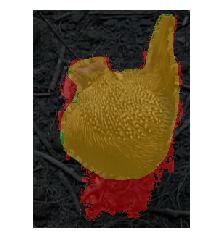

0.766779333655239


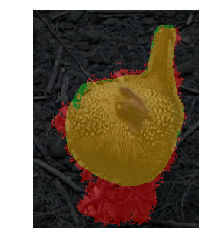

0.7318597733177693


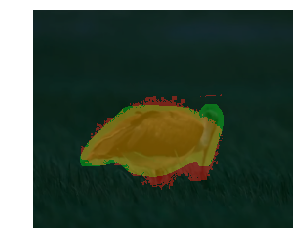

0.7995275421453881


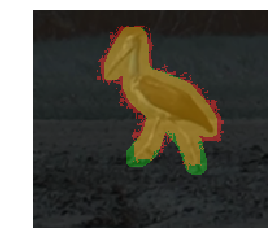

0.791861721281959


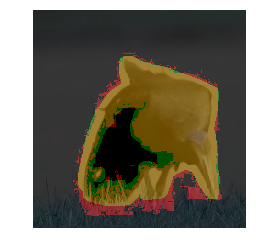

0.7849852194768252


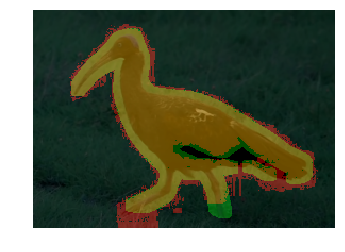

0.785382317140644


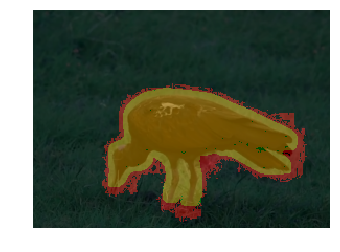

0.7923230974632843


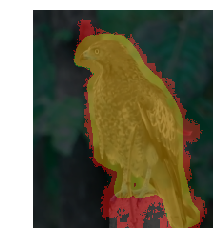

0.7883448642895157


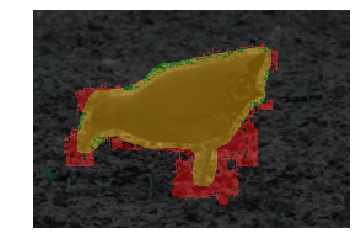

0.7269340519974635


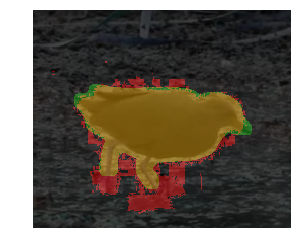

0.7356412273800157


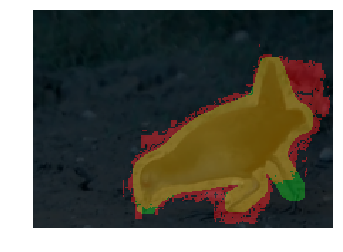

0.7301554828150573


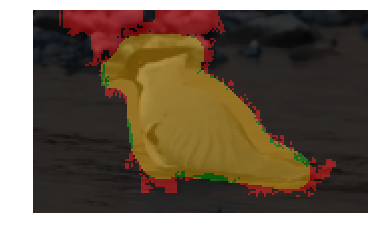

0.7196625567813109


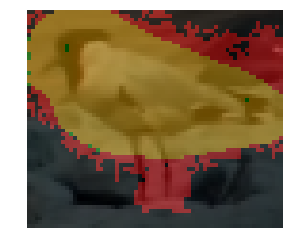

0.7301136363636364


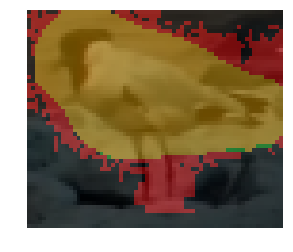

0.7318367346938776


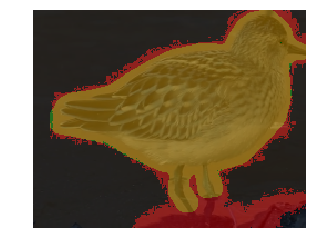

0.7916540097205347


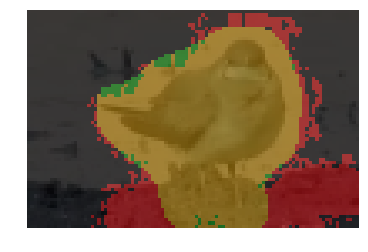

0.7008450704225352


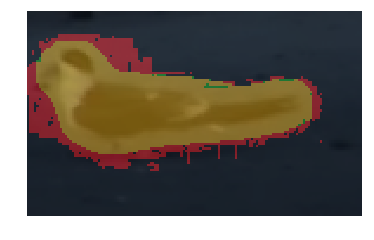

0.7591965696231099


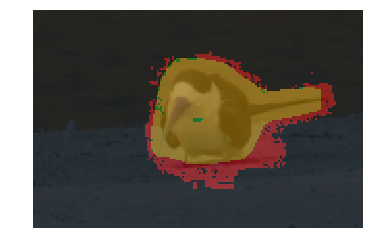

0.7189125295508274


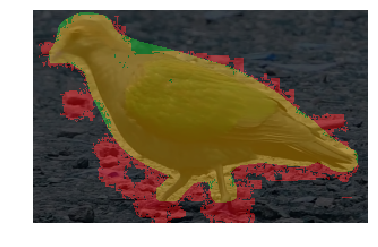

0.7368591356870641


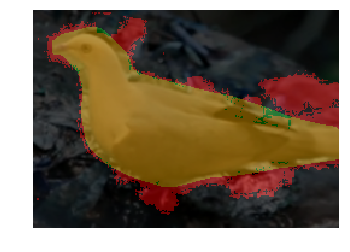

0.7356591747735659


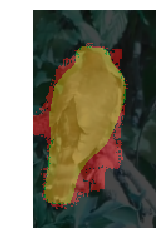

0.7360059391239792


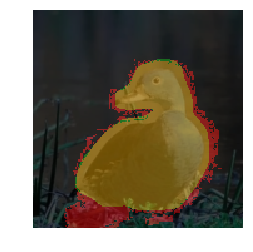

0.7979759765440272


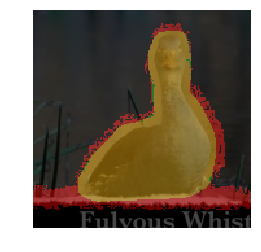

0.740245909574983


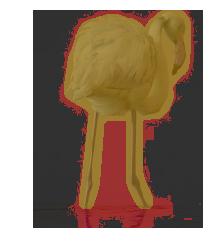

0.7071592931880346


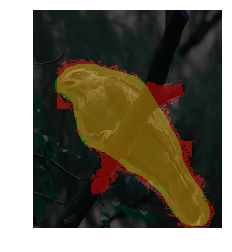

0.7963397465978413


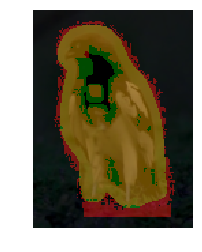

0.7474475485246269


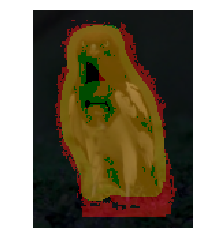

0.7236197321136884


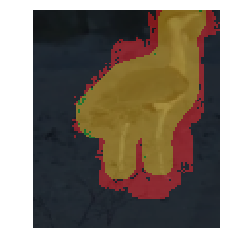

0.7160924552987353


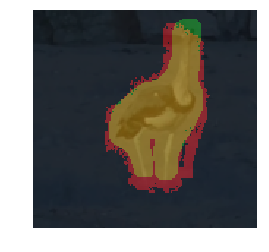

0.7351006191950464


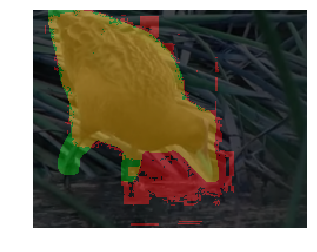

0.7310854283331347


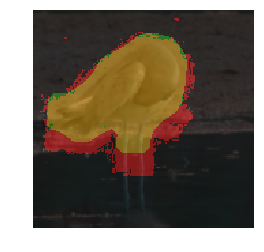

0.7301398785959357


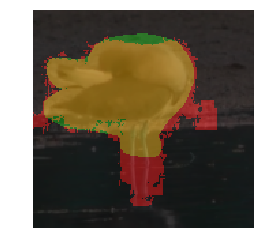

0.7368601462522852


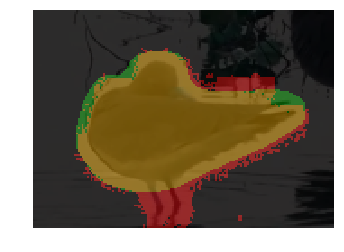

0.7800687285223368


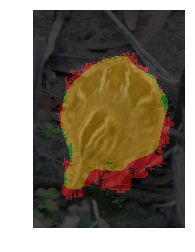

0.7998967653131452


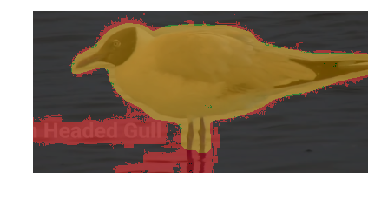

0.7321116928446771


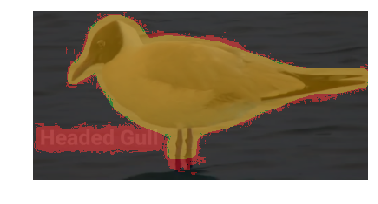

0.794515494343335


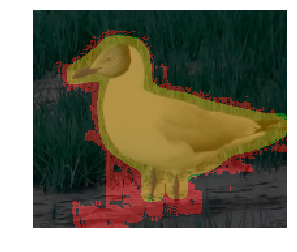

0.7190811411633938


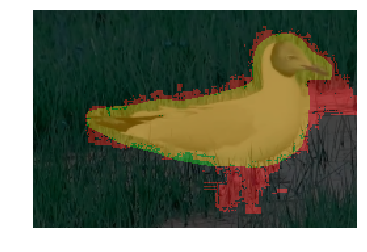

0.7174100493846516


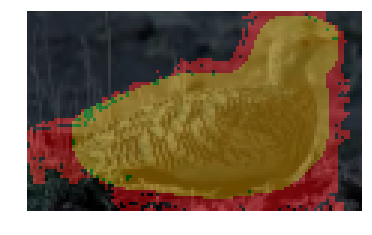

0.7250367878915283


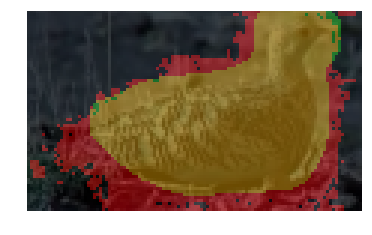

0.7061328790459966


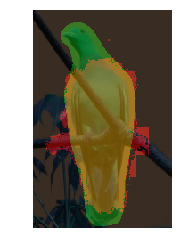

0.7151531879657742


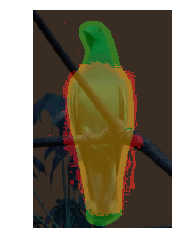

0.7242590559824369


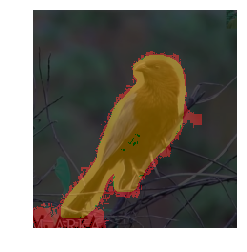

0.7756070552875108


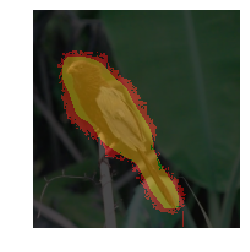

0.7500436071864643


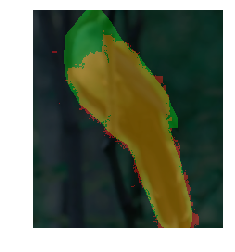

0.7849682834625489


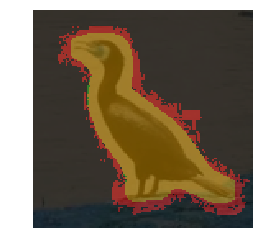

0.75199203187251


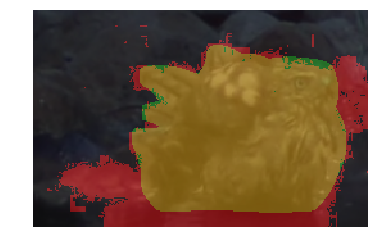

0.7287926206555757


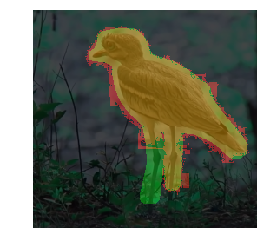

0.7880537229029217


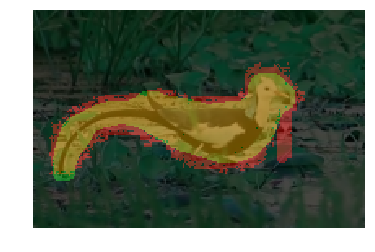

0.7240265261010033


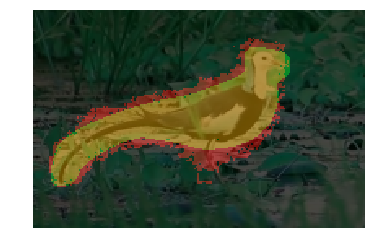

0.7329120239481124


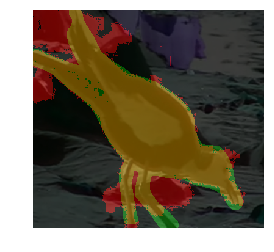

0.7042029548270188


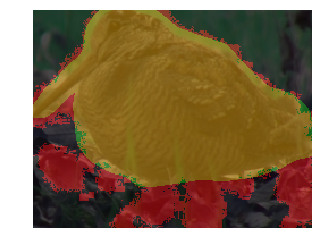

0.7479556605487916


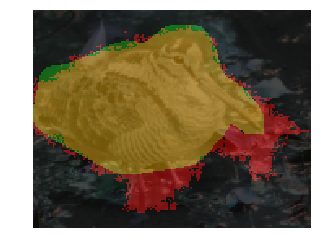

0.7715754682335659


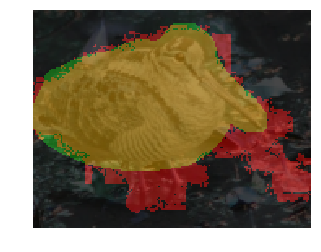

0.7068089007417285


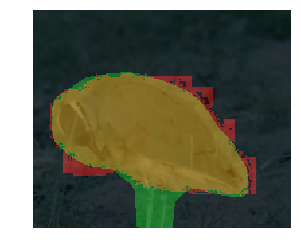

0.798290141597649


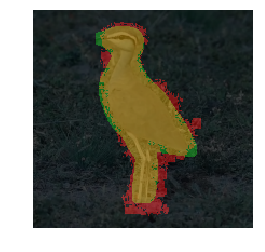

0.7633262260127932


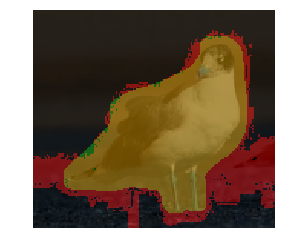

0.7007488212998059


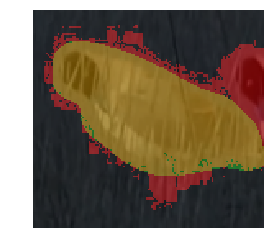

0.7246473397756303


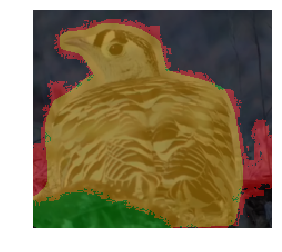

0.7857882604483346


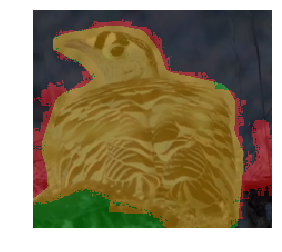

0.7991856623168575


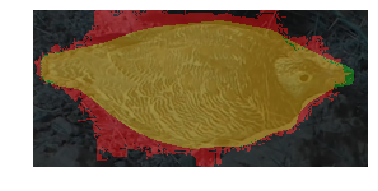

0.7730454790228619


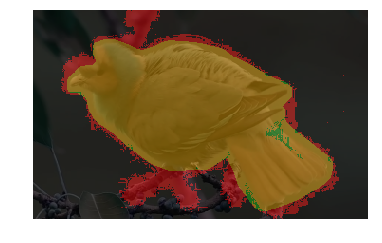

0.7988250505959074


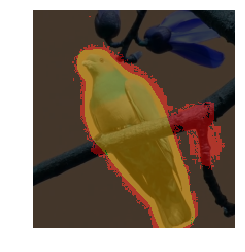

0.7453523562472979


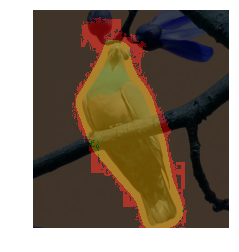

0.7778183945021202


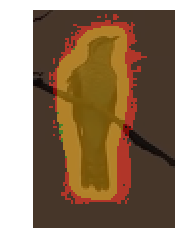

0.7748904195366312


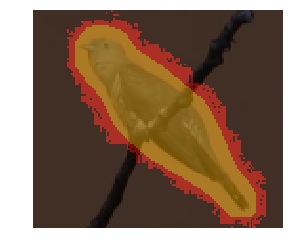

0.7227165425821681


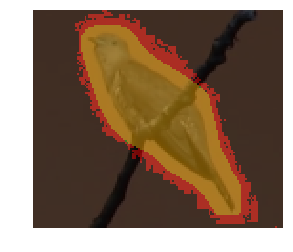

0.7510460251046025


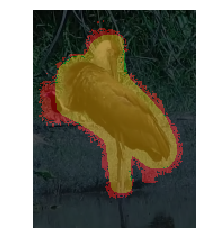

0.7962567388871936


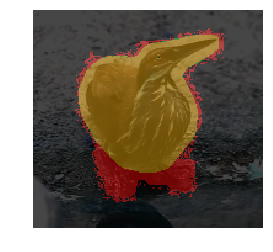

0.7634031558549415


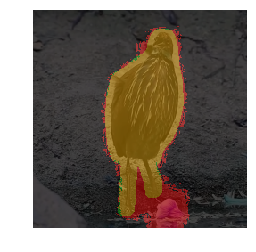

0.7651322233104799


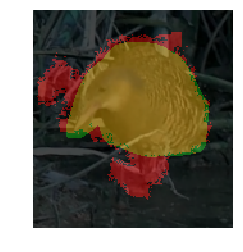

0.7118288171182882


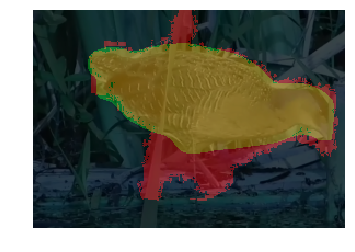

0.7243185566010282


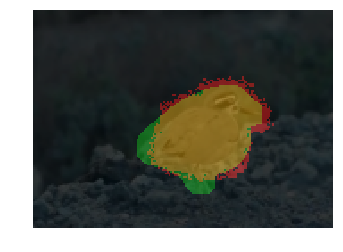

0.7700065061808719


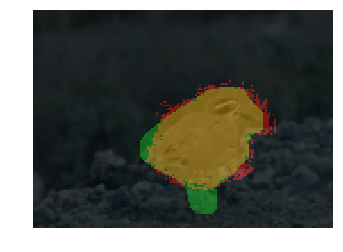

0.7841772151898734


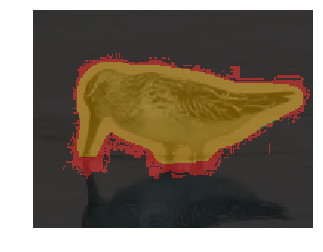

0.7988907376594565


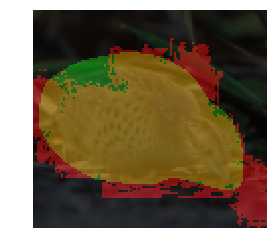

0.7123248498713183


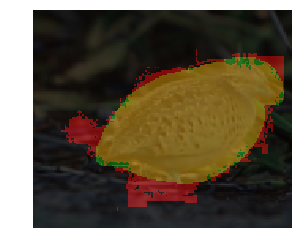

0.7819727465933242


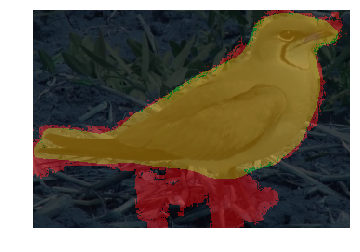

0.7317662565905096


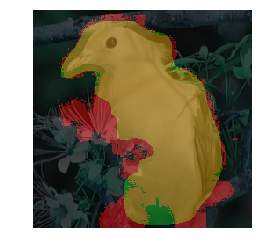

0.7522886913678885


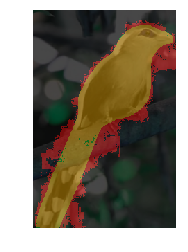

0.7149106516445876


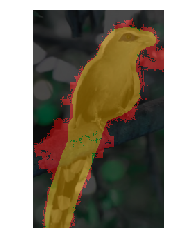

0.7385103011093502


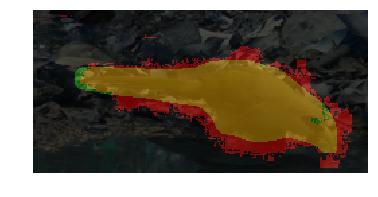

0.7094263169119215


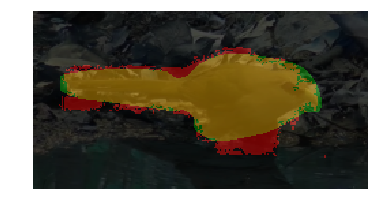

0.7871188037207112


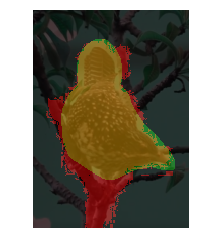

0.7153463258246857


In [5]:
########################### Overlay Images #################################
# class_list = [93]
class_list = [
11,17,23,35,39,44,50,57,64,68,75,80,85,9,94,98,
12,18,24,36,40,46,52,58,65,70,76,81,86,90,95,
13,20,25,37,42,48,54,59,66,71,77,83,88,91,96,
16,22,38,43,49,56,63,67,73,78,84,89,93,97]
res = []
# for label in [9]:
edges=0
for label in class_list:
    old_path = "/storage/OriginalImages/"+str(label)+"/"
    lookup_path = "/storage/OverlapMetric/"+str(label)+"/"
#     tmp_path = "/storage/OverlapMetric2/"+str(label)+"/"
#     if not os.path.exists(tmp_path):
#         os.mkdir(tmp_path)
    res_path = "/storage/IndianBirdImages2/"+str(label)+"/"
    dnames = os.listdir(lookup_path)
#     for dname in ['LXtRn2BRR2A']:
    for dname in dnames:
        files = os.listdir(lookup_path+dname+"/")
#         for i in range(2):
#             fnames = os.listdir(lookup_path)
        for file in files:
            fullpath = lookup_path+dname+"/"+file
            gt = cv2.imread(fullpath)
            fullpath = old_path+dname+"/"
            if not os.path.exists(fullpath):
#                 print(fullpath)
                continue
            a = os.listdir(fullpath)
            b = natsort.natsorted(a)
            ind = b.index(file)
            fullpath = res_path+dname+"/"
            if not os.path.exists(fullpath):
#                 print(fullpath)
                continue
            a = os.listdir(fullpath)
            b = natsort.natsorted(a)
            fname = b[ind]
            fullpath = res_path+dname+"/"+fname
#             if not os.path.exists(tmp_path+dname+"/"):
#                 os.mkdir(tmp_path+dname+"/")
            img = cv2.imread(fullpath)
            if img is None:
                print("no img:"+fullpath)
                continue
            a = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
#             a = (a.astype(bool))
            b = cv2.cvtColor(gt, cv2.COLOR_BGR2GRAY)
            Y=[]
            i=0;
            psize = 8
            patches = image.extract_patches_2d(b, (psize, psize))
            while i < len(patches):
            # for i in range(len(patches)):
#                 a1 = patches[i].flatten()
                if(np.count_nonzero(patches[i])>=(psize*psize/2)):
                    Y.append(1)
                else:
                    Y.append(0)
                i=i+1
            i=0;
            mask = np.zeros_like(patches)
            for i in range(len(Y)):
                if(Y[i]==1):
                    mask[i] = mask[i] + 1
            reconstructed = []
            reconstructed = image.reconstruct_from_patches_2d(mask, b.shape)
            a = (a.astype(bool)).astype(int)
            a = a.astype(int)*255
            c = reconstructed.astype(np.bool)
            
            fullpath = old_path+dname+"/"+file
            orig_img = cv2.imread(fullpath)
            orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
            
            # delete zero columns
            c = np.delete(c,np.where(~orig_img.any(axis=0))[0], axis=1)
            a = np.delete(a,np.where(~orig_img.any(axis=0))[0], axis=1)
            img= np.delete(img,np.where(~orig_img.any(axis=0))[0], axis=1)
            orig_img= np.delete(orig_img,np.where(~orig_img.any(axis=0))[0], axis=1)
            # delete zero rows
            c= np.delete(c,np.where(~orig_img.any(axis=1))[0], axis=0)
            a= np.delete(a,np.where(~orig_img.any(axis=1))[0], axis=0)
            img= np.delete(img,np.where(~orig_img.any(axis=1))[0], axis=0)
            orig_img= np.delete(orig_img,np.where(~orig_img.any(axis=1))[0], axis=0)
#             r = np.zeros_like(orig_img)
#             print(r.shape)
#             r[:,:,0] = c
#             newim = cv2.addWeighted(orig_img,1,r,0.7,0)
#             plt.imshow(newim),plt.show()

#             fig.savefig('foo1.png')
#             plt.imshow(img)
#             plt.imshow(c,alpha=0.3)
# #             plt.savefig('foo.png')
#             plt.savefig(file, bbox_inches='tight', pad_inches=0)
# #             plt.imshow(a,alpha=0.2)
# #             plt.imshow(gt/gt,alpha=0.4)
#             plt.show()
#             plt.imshow(img),plt.show()
            
#             cv2.imwrite(tmp_path+dname+"/"+fname,c.astype(int)*255);
#             ret,c = cv2.threshold(reconstructed,0.4,1,cv2.THRESH_BINARY)
#             plt.imshow(c.astype(int)*255),plt.show();
#             plt.imshow(a.astype(int)*255),plt.show();
#             from sklearn.metrics import mean_squared_error
#             from skimage import measure
#             print(mean_squared_error(a,b) )
#             print(measure.compare_ssim(a,b))
#             print(np.unique(a))
#             print(measure.compare_psnr(b,a))
            intersection = sum(sum(np.logical_and(a.astype(bool),c.astype(bool))))
            union = sum(sum(np.logical_or(a.astype(bool),c.astype(bool))))
            iou = intersection/union
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            if(iou>0.7 and iou<0.8):
                ov=np.zeros_like(img)
                blue = np.zeros_like(img)
                tmp = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
                blue[:,:,0] = tmp.astype(bool).astype(int)*255
                edges = canny(tmp.astype(bool))
                ov[:,:,1]=c*255
                orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
                cv2.imwrite("median_orig/"+file, orig_img)
#                 img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                plt.imshow(orig_img)
                plt.imshow(blue,alpha=0.6)
                plt.imshow(ov,alpha=0.3)
                plt.axis('off')
#                 plt.imshow(edges,alpha=0.4)
                plt.savefig("median/"+file, bbox_inches='tight', pad_inches=0)
                plt.show()
                print(iou)
#             if(iou<0.6):
#                 ######## new code #########
#                 ov=np.zeros_like(img)
#                 blue = np.zeros_like(img)
#                 tmp = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#                 blue[:,:,0] = tmp.astype(bool).astype(int)*255
#                 edges = canny(tmp.astype(bool))
#                 ov[:,:,1]=c*255
#                 plt.imshow(orig_img)
#                 plt.imshow(blue,alpha=0.6)
#                 plt.imshow(ov,alpha=0.3)
#                 plt.axis('off')
#                 ####### old code ########
# #                 plt.imshow(img)
# #                 plt.imshow(c,alpha=0.3)
#                 plt.savefig("bad/"+file, bbox_inches='tight', pad_inches=0)
#                 plt.show()
#             res.append(iou)
#             res.append(measure.compare_psnr(b,a))
#             if(iou<0.5):
#                 print(str(label)+':'+dname+":"+fname+"-"+file+":"+str(iou))
#             print(str(intersection)+":"+str(union))
#             inter1 = np.logical_and(a,b)
#             inter1 = sum(sum(inter1))
#             print(inter1)
#             if(iou<0.5):
#                 print(str(label)+':'+dname+":"+fname+":"+str(iou))
# print("Mean iou:")
# print(str(np.mean(res)))
# print("Median:")
# print(str(np.median(res)))
# print("90th percentile:")
# print(str(np.percentile(res,90)))

In [48]:
# edges = canny(img[:,:,2])

In [49]:
# np.unique(edges)

array([False])

In [4]:
res2=[]
for i in range(len(res)):
    if(res[i]<0.70):
        print(res[i])
    else:
        res2.append(res[i])

0.6269509476031215
0.5932154664366824
0.6827659012932172
0.6862697741818621
0.6119589345172031
0.6111111111111112
0.5983606557377049
0.5533939070016034
0.5215990905646078
0.6981351981351981
0.6947004608294931
0.6460244648318043
0.6104924523632764
0.5806134002855314
0.664307895942575
0.5527603074772887
0.6773931855056787
0.6985727878211228
0.5617261360170783
0.6236066948530696
0.6243272335844995
0.6773298276365761
0.6140053500013243
0.5477818691916535
0.6414669125179266
0.522837184309511
0.6964364000751551
0.670969806892137
0.6908857659338737
0.512856684834883
0.5617613291011009
0.5465380249716232
0.596537949400799
0.6308119361554476
0.5268568491390389
0.5222547108512021
0.5624279677295428
0.6602551521099117
0.6754798276537407
0.6370322476359815
0.6835529928610653
0.5277226084078119
0.5923299565846599
0.6633859078367582
0.6455332950708079
0.6885103698446495
0.6985350668375755
0.6762964032933699
0.6939485489334432
0.627808236118554
0.6691975012013455
0.6538235725818289
0.6493384426288772

In [16]:
len(res)

248

In [17]:
len(res2)

246

In [18]:
print("Mean psnr:")
print(str(np.mean(res2)))
print("Median:")
print(str(np.median(res2)))
print("90th percentile:")
print(str(np.percentile(res2,90)))

Mean psnr:
0.7565321558913791
Median:
0.7743499716730775
90th percentile:
0.8669092543890544


In [2]:
# class_list = [93]
class_list = [
11,17,23,35,39,44,50,57,64,68,75,80,85,9,94,98,
12,18,24,36,40,46,52,58,65,70,76,81,86,90,95,
13,20,25,37,42,48,54,59,66,71,77,83,88,91,96,
16,22,38,43,49,56,63,67,73,78,84,89,93,97]
res = []
# for label in [9]:
for label in class_list:
    old_path = "/storage/OriginalImages/"+str(label)+"/"
    lookup_path = "/storage/OverlapMetric2/"+str(label)+"/"
    res_path = "/storage/IndianBirdImages2/"+str(label)+"/"
    dnames = os.listdir(lookup_path)
#     for dname in ['LXtRn2BRR2A']:
    for dname in dnames:
        files = os.listdir(lookup_path+dname+"/")
#         for i in range(2):
#             fnames = os.listdir(lookup_path)
        for file in files:
            fullpath = lookup_path+dname+"/"+file
            gt = cv2.imread(fullpath)
#             fullpath = old_path+dname+"/"
#             if not os.path.exists(fullpath):
# #                 print(fullpath)
#                 continue
#             a = os.listdir(fullpath)
#             b = natsort.natsorted(a)
#             ind = b.index(file)
#             fullpath = res_path+dname+"/"
#             if not os.path.exists(fullpath):
# #                 print(fullpath)
#                 continue
#             a = os.listdir(fullpath)
#             b = natsort.natsorted(a)
#             fname = b[ind]
#             fullpath = res_path+dname+"/"+fname
            fullpath = res_path+dname+"/"+file
            img = cv2.imread(fullpath)
            if img is None:
                print("no img:"+fullpath)
                continue
            a = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#             a = (a.astype(bool)).astype(int)
#             a = (a.astype(bool))
            b = cv2.cvtColor(gt, cv2.COLOR_BGR2GRAY)
            im1 = np.logical_or(a.astype(bool),b.astype(bool))
            im1 = im1.astype(int)
            im2 = np.logical_xor(a.astype(bool),b.astype(bool))
            im2 = im2.astype(int)
#             b = (b.astype(bool)).astype(int)
#             b = (b.astype(bool))
#             plt.imshow(im1*255),plt.show();
#             plt.imshow(im2*255),plt.show();
#             print(mean_squared_error(a,b) )
#             print(measure.compare_ssim(a,b))
#             print(np.unique(a))
#             print(measure.compare_psnr(b,a))
            intersection = sum(sum(np.logical_and(a.astype(bool),b.astype(bool))))
            union = sum(sum(np.logical_or(a.astype(bool),b.astype(bool))))
            iou = intersection/union
            res.append(iou)
#             res.append(measure.compare_psnr(b,a))
#             print(str(label)+':'+dname+":"+fname+":"+str(iou))
#             print(str(intersection)+":"+str(union))
#             inter1 = np.logical_and(a,b)
#             inter1 = sum(sum(inter1))
#             print(inter1)
            if(iou<0.7):
                print(str(label)+':'+dname+":"+file+":"+str(iou))
print("Mean psnr:")
print(str(np.mean(res)))
print("Median:")
print(str(np.median(res)))
print("90th percentile:")
print(str(np.percentile(res,90)))

11:mXQQkeHwqcs:mXQQkeHwqcs_300.png:0.6269509476031215
11:mXQQkeHwqcs:mXQQkeHwqcs_717.png:0.5932154664366824
17:EXLEun0g_bg:EXLEun0g_bg_281.png:0.6827659012932172
35:3dJbCXHPnxg:3dJbCXHPnxg_902.png:0.6862697741818621
39:F17G-42LeTU:F17G-42LeTU_721.png:0.6119589345172031
39:F17G-42LeTU:F17G-42LeTU_759.png:0.6111111111111112
39:PZ_28ifSChQ:PZ_28ifSChQ_1734.png:0.5983606557377049
39:PZ_28ifSChQ:PZ_28ifSChQ_6893.png:0.5533939070016034
44:Lt03GjaCr6c:Lt03GjaCr6c_827.png:0.5215990905646078
50:h6U1WJNMQIw:h6U1WJNMQIw_321.png:0.6981351981351981
50:h6U1WJNMQIw:h6U1WJNMQIw_296.png:0.6947004608294931
57:xgsZ7lah_RY:xgsZ7lah_RY_149.png:0.6460244648318043
57:xgsZ7lah_RY:xgsZ7lah_RY_306.png:0.6104924523632764
64:zcsDVhQK1q4:zcsDVhQK1q_1493.png:0.5806134002855314
64:zcsDVhQK1q4:zcsDVhQK1q_1490.png:0.664307895942575
68:9AlUIL1fufY:9AlUIL1fufY_833.png:0.5527603074772887
68:9AlUIL1fufY:9AlUIL1fufY_89.png:0.6773931855056787
75:pdh6IrjaYq4:pdh6IrjaYq4_23.png:0.6985727878211228
80:FNlyNty5STA:FNlyNty5STA_13

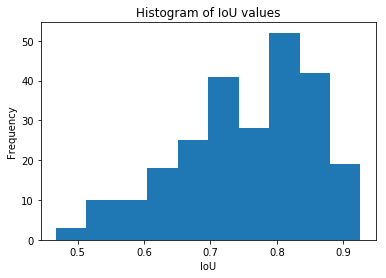

In [5]:
plt.hist(res)
plt.xlabel('IoU')
plt.ylabel('Frequency')
plt.title('Histogram of IoU values')
plt.show()

In [79]:
res

[28.424548862248884,
 28.453071294136677,
 23.215101786817716,
 23.807143006991424,
 15.473230758471065,
 26.32185241276078,
 25.217353239951613,
 26.9643891720101,
 21.190923950164205,
 19.652495675607327,
 23.15696255398137,
 22.449779490015512,
 24.933342047633445,
 25.503138814233207,
 21.065503597630496,
 21.692383461530884,
 21.983079750016245,
 21.524604709078822,
 27.741213589281728,
 26.27202005839862,
 25.359384535289404,
 23.261229201665998,
 23.676011013848775,
 26.121839743863447,
 28.57944365797116,
 26.427722987477846,
 28.49536349727648,
 28.63930551324671,
 23.20612017846152,
 23.495986389635746,
 22.530527304917058,
 22.06725210090381,
 20.384028891249226,
 20.808228058912505,
 25.67328896751679,
 26.14622201600158,
 19.265354904451925,
 19.421762837134203,
 25.184704885594446,
 24.114838200005227,
 27.91568748798584,
 28.072201003552507,
 27.071652448218853,
 26.14405270306557,
 18.298732754641055,
 19.313072385396858,
 20.52353062211742,
 18.552255701570864,
 23.970

In [15]:
# class_list = [93]
class_list = [
11,17,23,35,39,44,50,57,64,68,75,80,85,9,94,98,
12,18,24,36,40,46,52,58,65,70,76,81,86,90,95,
13,20,25,37,42,48,54,59,66,71,77,83,88,91,96,
16,22,38,43,49,56,63,67,73,78,84,89,93,97]
res = []
for label in class_list:
    lookup_path = "/storage/OverlapMetric/"+str(label)+"/"
    res_path = "/storage/IndianBirdImages2/"+str(label)+"/"
    dnames = os.listdir(lookup_path)
    for dname in dnames:
        files = os.listdir(lookup_path+dname+"/")
#         for i in range(2):
#             fnames = os.listdir(lookup_path)
        for file in files:
            fullpath = lookup_path+dname+"/"+file
            gt = cv2.imread(fullpath)
            fullpath = res_path+dname+"/"+file
            img = cv2.imread(fullpath)
            if img is None:
                print(fullpath)
                continue
            intersection = sum(sum(sum(img.astype(bool)*gt.astype(bool))))
            union = sum(sum(sum(img.astype(bool)+gt.astype(bool))))
            iou = intersection/union
            res.append(iou)
#             print(str(iou))
print("Mean iou:")
print(str(np.mean(res)))
print("Median:")
print(str(np.median(res)))
print("90th percentile:")
print(str(np.percentile(res,90)))

/storage/IndianBirdImages2/11/mXQQkeHwqcs/mXQQkeHwqcs_840.png
/storage/IndianBirdImages2/11/mXQQkeHwqcs/mXQQkeHwqcs_423.png
/storage/IndianBirdImages2/35/3dJbCXHPnxg/3dJbCXHPnxg_1730.png
/storage/IndianBirdImages2/35/3dJbCXHPnxg/3dJbCXHPnxg_1258.png
/storage/IndianBirdImages2/44/3M6lvAV8v48/3M6lvAV8v48_1150.png
/storage/IndianBirdImages2/64/zcsDVhQK1q4/zcsDVhQK1q4_1563.png
/storage/IndianBirdImages2/64/zcsDVhQK1q4/zcsDVhQK1q4_1560.png
/storage/IndianBirdImages2/68/mL3xCKCBFUA/mL3xCKCBFUA_900.png
/storage/IndianBirdImages2/68/mL3xCKCBFUA/mL3xCKCBFUA_1774.png
/storage/IndianBirdImages2/75/bbIjn2jt-dE/bbIjn2jt-dE_904.png
/storage/IndianBirdImages2/75/bbIjn2jt-dE/bbIjn2jt-dE_853.png
/storage/IndianBirdImages2/80/FNlyNty5STA/FNlyNty5STA_186.png
/storage/IndianBirdImages2/9/_dQFefhBscE/_dQFefhBscE_691.png
/storage/IndianBirdImages2/9/un13RmJ_3-Y/un13RmJ_3-Y_383.png
/storage/IndianBirdImages2/9/un13RmJ_3-Y/un13RmJ_3-Y_657.png
/storage/IndianBirdImages2/94/QY5r7cze8Mg/QY5r7cze8Mg_532.png
/stor

In [8]:
corners=[]
def mouse_click(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        corners.append([x,y])

        for i in corners:
            [x,y] = i
            cv2.circle(img2,(x,y),3,255,-1)

In [13]:

# label = 16
# class_list = [11,17,23,35,39,44,50,57,64,68,75,80,85,9,94,98,
# 12,18,24,36,40,46,52,58,65,70,76,81,86,90,95,
# 13,20,25,37,42,48,54,59,66,71,77,83,88,91,96,
# 16,22,38,43,49,56,63,67,73,78,84,89,93,97]

class_list = [
#     11,17,23,35,39,44,50,57,64,68,75,80,85,94,98,9,
# 12,18,24,36,40,46,52,58,65,70,76,81,86,90,95,
# 13,20,25,37,42,48,54,59,66,71,77,83,88,91,96,
# 22,38,43,49,56,63,67,73,78,84,89,93,97
]
for label in class_list:
    lookup_path = "/storage/OriginalImages/"+str(label)+"/"
    storepath = "/storage/OverlapMetric/"+str(label)+"/"
    if not os.path.exists(storepath):
        os.mkdir(storepath)
    dnames = os.listdir(lookup_path)
    for dname in dnames:
        files = os.listdir(lookup_path+dname)
        for i in range(2):
            num = np.random.randint(len(files))
            file = files[num]
            fullpath = lookup_path+dname+"/"+file
            savepath = storepath+dname+"/"
            if not os.path.exists(savepath):
                os.mkdir(savepath)
            savepath = savepath+file
            img = cv2.imread(fullpath)
            cv2.namedWindow('Frame')
            cv2.setMouseCallback("Frame", mouse_click)
            corners=[]
            img2 = copy.copy(img)
            while True:
                key = cv2.waitKey(1) or 0xff
                cv2.imshow('Frame',img2)
                # if the `q` key was pressed, break from the loop
                if key == ord("q"):
                    break

            # close all windows
            cv2.destroyAllWindows()

            mask = np.zeros((img.shape[0], img.shape[1]))
            cv2.fillPoly(mask, [np.array(corners)], 1)
            mask = mask.astype(np.bool)
            silhouette = np.zeros_like(img)
            silhouette[mask] = img[mask]
            cv2.imwrite(savepath,silhouette)

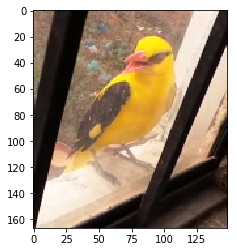

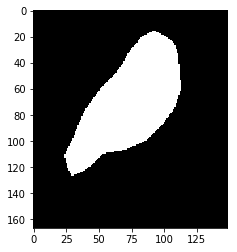

In [2]:
label=182
basepath = "training/"+str(label)+"/"
loadpath = basepath+"train/"
f1 = "YK4WwYQan"
img = cv2.imread(loadpath+f1+'-frame.png');
# im_max = max(img.flatten())
# im_min = min(img.flatten())
# img = (img - im_min)/(im_max - im_min)
imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
imgHSV=imgHSV[:,:,0]
sil = cv2.imread(loadpath+f1+'-gt.png');
# sil = cv2.cvtColor(sil, cv2.COLOR_BGR2HSV)
# sil=sil[:,:,0]
# [m,n] = img.shape
# [m1,n1] = sil.shape
# a=0
# b=0
# if(m1<m):
#     a = m 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img),plt.show();
plt.imshow(sil*255),plt.show();
# cv2.imshow("Img",img);
# cv2.imshow("Sil",sil);
# cv2.waitKey(0)
# cv2.destroyAllWindows()

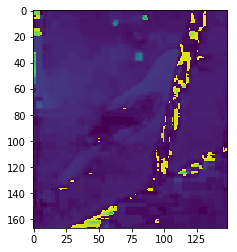

In [14]:
plt.imshow(next_img_hsv),plt.show();

In [13]:
cv2.imshow("Img",next_img_hsv);

# cv2.imshow("Sil",sil);
cv2.waitKey(0)
cv2.destroyAllWindows()

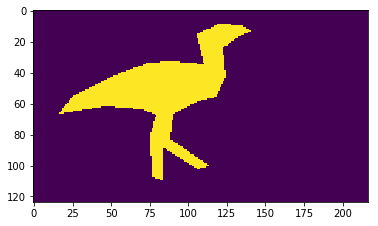

True

In [11]:
############## Mark new points ######################

storepath = "training/"+str(label)+"/train/"
if not os.path.exists(storepath):
    os.mkdir(storepath)

corners=[]

def mouse_click(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDOWN:
        corners.append([x,y])

        for i in corners:
            [x,y] = i
            cv2.circle(img2,(x,y),3,255,-1)
        

cv2.namedWindow('Frame')
cv2.setMouseCallback("Frame", mouse_click)

img2 = copy.copy(img)
while True:
    key = cv2.waitKey(1) or 0xff
    cv2.imshow('Frame',img2)
    # if the `q` key was pressed, break from the loop
    if key == ord("q"):
        break

# close all windows
cv2.destroyAllWindows()

mask = np.zeros((img.shape[0], img.shape[1]))
cv2.fillPoly(mask, [np.array(corners)], 1)
plt.imshow(mask),plt.show()

cv2.imwrite(storepath+'gt1.png',mask)
mask = mask.astype(np.bool)
silhouette = np.zeros_like(img)
silhouette[mask] = img[mask]
cv2.imwrite(storepath+'extracted_silhouette1.png',silhouette)

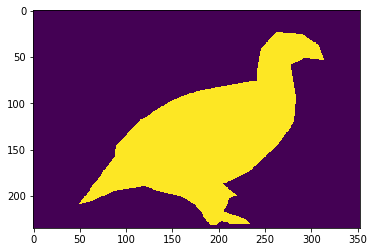

(<matplotlib.image.AxesImage at 0x7fb7b7b0c518>, None)

In [25]:
mask = np.zeros((img.shape[0], img.shape[1]))
cv2.fillPoly(mask, [np.array(corners)], 1)
plt.imshow(mask),plt.show()

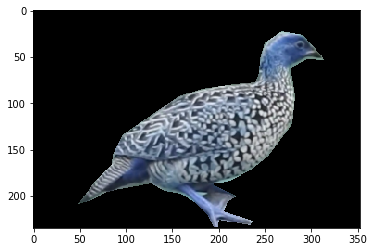

(<matplotlib.image.AxesImage at 0x7fb7b7a71470>, None)

In [33]:
mask = mask.astype(np.bool)
silhouette = np.zeros_like(img)
silhouette[mask] = img[mask]
plt.imshow(silhouette),plt.show()

In [34]:
cv2.imwrite(storepath+'extracted_silhouette1.png',silhouette)

True

In [31]:
silhouette

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [5]:
svc=SVC()

In [6]:
svc.load_from_file("output/40/"+"vid2_svc.pkl")

In [22]:
svc.shrinking

False

In [7]:
output = svc.predict(test_X)

In [38]:
orig_score = accuracy_score(test_Y,output)

In [39]:
orig_score

0.9950567209582356

In [11]:
sv = svc.support_vectors_

In [33]:
sv.shape

(1813, 193)

In [17]:
len(sv)

1813

In [32]:
indices = []

In [40]:
for i in range(858,len(sv)):
    print(i)
    svc.support_vectors_ = np.delete(sv,i,0)

    prediction = svc.predict(test_X)
    score = accuracy_score(test_Y,prediction)

    if orig_score - score <= 2:
        print(orig_score - score)
        indices.append(i)

858
0.0
859
0.0
860
0.0
861
0.0
862
0.0
863
0.0
864
0.0
865
0.0
866
0.0
867
0.0
868
0.0
869
0.0
870
0.0
871
0.0
872
0.0
873
0.0
874
0.0
875
0.0
876
0.0
877
0.0
878
0.0
879
0.0
880
0.0
881
0.0
882
0.0
883
0.0
884
0.0
885
0.0
886
0.0
887
0.0
888
0.0
889
0.0
890
0.0
891
0.0
892
0.0
893
0.0
894
0.0
895
0.0
896
0.0
897
0.0
898
0.0
899
0.0
900
0.0
901
0.0
902
0.0
903
0.0
904
0.0
905
0.0
906
0.0
907
0.0
908
0.0
909
0.0
910
0.0
911
0.0
912
0.0
913
0.0
914
0.0
915
0.0
916
0.0
917
0.0
918
0.0
919
0.0
920
0.0
921
0.0
922
0.0
923
0.0
924
0.0
925
0.0
926
0.0
927
0.0
928
0.0
929
0.0
930
0.0
931
0.0
932
0.0
933
0.0
934
0.0
935
0.0
936
0.0
937
0.0
938
0.0
939
0.0
940
0.0
941
0.0
942
0.0
943
0.0
944
0.0
945
0.0
946
0.0
947
0.0
948
0.0
949
0.0
950
0.0
951
0.0
952
0.0
953
0.0
954
0.0
955
0.0
956
0.0
957
0.0
958
0.0
959
0.0
960
0.0
961
0.0
962
0.0
963
0.0
964
0.0
965
0.0
966
0.0
967
0.0
968
0.0
969
0.0
970
0.0
971
0.0
972
0.0
973
0.0
974
0.0
975
0.0
976
0.0
977
0.0
978
0.0
979
0.0
980
0.0
981
0.0
982
0.0


0.0
1785
0.0
1786
0.0
1787
0.0
1788
0.0
1789
0.0
1790
0.0
1791
0.0
1792
0.0
1793
0.0
1794
0.0
1795
0.0
1796
0.0
1797
0.0
1798
0.0
1799
0.0
1800
0.0
1801
0.0
1802
0.0
1803
0.0
1804
0.0
1805
0.0
1806
0.0
1807
0.0
1808
0.0
1809
0.0
1810
0.0
1811
0.0
1812
0.0


In [36]:
len(indices)

814

In [41]:
from sklearn import linear_model
clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(train_X, train_Y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [44]:
prediction = clf.predict(test_X)

In [45]:
accuracy_score(test_Y,prediction)

0.974649851067875